In [2]:
#Importamos las librerias
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import datetime as datetime
from shapely.geometry import Point
from matplotlib.colors import ListedColormap

%matplotlib inline
plt.style.use('default')
sns.set(style="whitegrid")

In [3]:
#Cargamos el csv
propiedades=pd.read_csv('train.csv')

In [4]:
#Cargamos el .shp de México
url="../Mapas/Mexico/MexicoPoly02.shp"
mex=gpd.read_file(url)

In [5]:
#Cargamos el .shp de los municipios de México
url_municipio="../Mapas/Municipios/Muni_2012gw.shp"
mex_municipio=gpd.read_file(url_municipio)

In [6]:
#Establecemos las longitudes extremas de México
lat_maxima=32.718333
lat_minima=14.540833
lng_maxima=-86.710000
lng_minima=-118.366666

In [7]:
propiedades.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0


In [8]:
propiedades.columns

Index([u'id', u'titulo', u'descripcion', u'tipodepropiedad', u'direccion',
       u'ciudad', u'provincia', u'antiguedad', u'habitaciones', u'garages',
       u'banos', u'metroscubiertos', u'metrostotales', u'idzona', u'lat',
       u'lng', u'fecha', u'gimnasio', u'usosmultiples', u'piscina',
       u'escuelascercanas', u'centroscomercialescercanos', u'precio'],
      dtype='object')

In [9]:
preciom2=propiedades.loc[:,['ciudad','provincia','metrostotales','metroscubiertos','precio','fecha']]
preciom2.head()

,ciudad,provincia,metrostotales,metroscubiertos,precio,fecha
0,Benito Juárez,Distrito Federal,80.0,80.0,2273000.0,2015-08-23 00:00:00
1,La Magdalena Contreras,Distrito Federal,180.0,268.0,3600000.0,2013-06-28 00:00:00
2,Tonalá,Jalisco,166.0,144.0,1200000.0,2015-10-17 00:00:00
3,Zinacantepec,Edo. de México,67.0,63.0,650000.0,2012-03-09 00:00:00
4,Zapopan,Jalisco,95.0,95.0,1150000.0,2016-06-07 00:00:00


In [10]:
preciom2['precio m2 construccion']=(preciom2['precio']/preciom2['metroscubiertos'])
preciom2['preciom2']=(preciom2['precio']/preciom2['metrostotales'])
preciom2.head()

,ciudad,provincia,metrostotales,metroscubiertos,precio,fecha,precio m2 construccion,preciom2
0,Benito Juárez,Distrito Federal,80.0,80.0,2273000.0,2015-08-23 00:00:00,28412.500000,28412.500000
1,La Magdalena Contreras,Distrito Federal,180.0,268.0,3600000.0,2013-06-28 00:00:00,13432.835821,20000.000000
2,Tonalá,Jalisco,166.0,144.0,1200000.0,2015-10-17 00:00:00,8333.333333,7228.915663
3,Zinacantepec,Edo. de México,67.0,63.0,650000.0,2012-03-09 00:00:00,10317.460317,9701.492537
4,Zapopan,Jalisco,95.0,95.0,1150000.0,2016-06-07 00:00:00,12105.263158,12105.263158


In [11]:
#tomando la cotizacion dolar hoy a 1USD = 19.40 pesos mexicanos
cotizacion = 19.4
preciom2['precio m2 dolares'] = (preciom2['preciom2']/cotizacion)
preciom2['precio m2 construccion dolares'] = (preciom2['precio m2 construccion']/cotizacion)
preciom2.head()

,ciudad,provincia,metrostotales,metroscubiertos,precio,fecha,precio m2 construccion,preciom2,precio m2 dolares,precio m2 construccion dolares
0,Benito Juárez,Distrito Federal,80.0,80.0,2273000.0,2015-08-23 00:00:00,28412.500000,28412.500000,1464.561856,1464.561856
1,La Magdalena Contreras,Distrito Federal,180.0,268.0,3600000.0,2013-06-28 00:00:00,13432.835821,20000.000000,1030.927835,692.414218
2,Tonalá,Jalisco,166.0,144.0,1200000.0,2015-10-17 00:00:00,8333.333333,7228.915663,372.624519,429.553265
3,Zinacantepec,Edo. de México,67.0,63.0,650000.0,2012-03-09 00:00:00,10317.460317,9701.492537,500.076935,531.827851
4,Zapopan,Jalisco,95.0,95.0,1150000.0,2016-06-07 00:00:00,12105.263158,12105.263158,623.982637,623.982637


In [12]:
preciom2.describe()

,metrostotales,metroscubiertos,precio,precio m2 construccion,preciom2,precio m2 dolares,precio m2 construccion dolares
count,188533.000000,222600.000000,2.400000e+05,222600.000000,188533.000000,188533.000000,222600.000000
mean,176.765145,174.016774,2.530838e+06,14695.572399,14055.691813,724.520197,757.503732
std,94.427328,98.152950,2.152552e+06,11279.392000,11946.477871,615.797828,581.411959
min,15.000000,15.000000,3.100000e+05,781.650485,720.000000,37.113402,40.291262
25%,102.000000,90.000000,9.527725e+05,8333.333333,7250.000000,373.711340,429.553265
50%,155.000000,153.000000,1.850000e+06,11600.000000,11267.605634,580.804414,597.938144
75%,238.000000,240.000000,3.390000e+06,17326.248386,17355.371901,894.606799,893.105587
max,439.000000,439.000000,1.252500e+07,583333.333333,733333.333333,37800.687285,30068.728522


In [20]:
preciom2.size

2400000

In [22]:
preciom2.dropna(inplace = True)
preciom2.size

1709090

In [29]:
#cuidades/provincias con valor m2 mas caro/mas barato
precio_ciudades = preciom2.groupby(['ciudad']).agg({'precio m2 construccion dolares':[np.mean, np.size]})
precio_ciudades=precio_ciudades[precio_ciudades[('precio m2 construccion dolares', 'size')] >= 50]
precio_ciudades.sort_values(('precio m2 construccion dolares', 'mean'), ascending = False)[:10]

precio m2 construccion dolares        
                                                 mean    size
ciudad                                                       
Miguel Hidalgo                            1651.604086  2866.0
Cuauhtémoc                                1455.441773  3676.0
San Pedro Garza García                    1433.584088   742.0
Benito Juárez                             1423.639928  6299.0
Cuajimalpa de Morelos                     1346.312535  1584.0
Alvaro Obregón                            1255.168555  3885.0
Huixquilucan                              1197.608087  3001.0
Coyoacán                                  1025.613355  3657.0
La Magdalena Contreras                    1016.247045  1326.0
Tlalpan                                    922.099897  3604.0

In [28]:
precio_provincias=preciom2.groupby(['provincia']).agg({'precio m2 construccion dolares':[np.mean, np.size]})
precio_provincias=precio_provincias[precio_provincias[('precio m2 construccion dolares', 'size')] >= 50]
precio_provincias.sort_values(('precio m2 construccion dolares', 'mean'), ascending = False)[:10]

precio m2 construccion dolares         
                                           mean     size
provincia                                               
Distrito Federal                    1152.897169  35194.0
Guerrero                             747.015672   1269.0
Quintana Roo                         686.517943   3089.0
Edo. de México                       678.545511  30556.0
Jalisco                              661.931212  17345.0
Tabasco                              611.230288    686.0
Morelos                              594.796134   4407.0
Campeche                             587.811947    162.0
Puebla                               583.833224   8102.0
Querétaro                            573.962387  13055.0

In [14]:
#variacion del m2 en funcion del tiempo



In [32]:
preciom2['Fecha']=pd.to_datetime(preciom2['fecha'])
preciom2.drop(columns={'fecha'},inplace=True)
preciom2['Anio']=preciom2['Fecha'].dt.year
preciom2['Mes']=preciom2['Fecha'].dt.month
preciom2['Dia']=preciom2['Fecha'].dt.day
preciom2.head()

,ciudad,provincia,metrostotales,metroscubiertos,precio,precio m2 construccion,preciom2,precio m2 dolares,precio m2 construccion dolares,Fecha,Anio,Mes,Dia
0,Benito Juárez,Distrito Federal,80.0,80.0,2273000.0,28412.500000,28412.500000,1464.561856,1464.561856,2015-08-23,2015,8,23
1,La Magdalena Contreras,Distrito Federal,180.0,268.0,3600000.0,13432.835821,20000.000000,1030.927835,692.414218,2013-06-28,2013,6,28
2,Tonalá,Jalisco,166.0,144.0,1200000.0,8333.333333,7228.915663,372.624519,429.553265,2015-10-17,2015,10,17
3,Zinacantepec,Edo. de México,67.0,63.0,650000.0,10317.460317,9701.492537,500.076935,531.827851,2012-03-09,2012,3,9
4,Zapopan,Jalisco,95.0,95.0,1150000.0,12105.263158,12105.263158,623.982637,623.982637,2016-06-07,2016,6,7


In [48]:
preciom2_anio=preciom2.groupby('Anio').agg({'precio m2 construccion dolares':[np.mean,np.size],'precio m2 dolares':[np.mean,np.size]})
preciom2_anio

precio m2 construccion dolares          precio m2 dolares         
                               mean     size              mean     size
Anio                                                                   
2012                     511.835829  14582.0        565.168771  14582.0
2013                     538.815872  19960.0        580.249566  19960.0
2014                     645.532453  28711.0        679.307049  28711.0
2015                     724.992753  38143.0        757.577451  38143.0
2016                     777.172841  69513.0        817.006934  69513.0

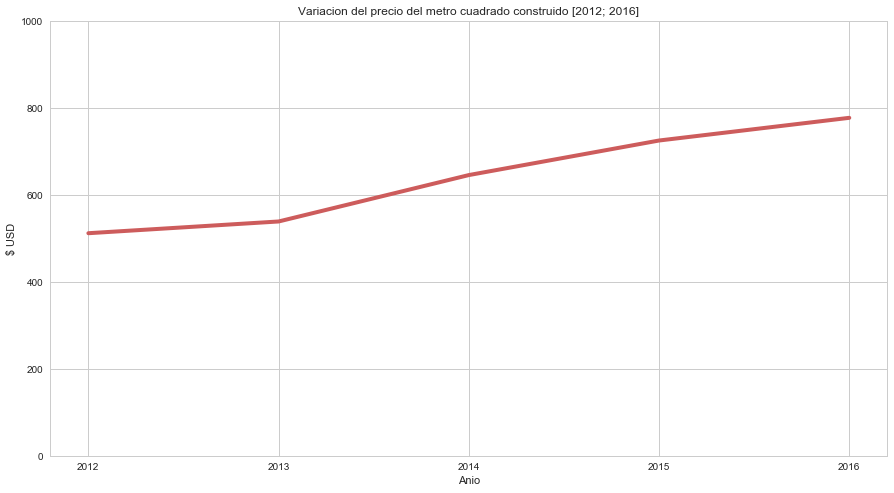

In [51]:
#m2 construido
l = [2012, 2013, 2014, 2015, 2016]
ax = preciom2_anio.plot(kind='line', y = ('precio m2 construccion dolares', 'mean'), figsize=(15,8),\
             title = "Variacion del precio del metro cuadrado construido [2012; 2016]",\
             xticks=l, legend = False, color = 'indianred', lw = 4)
ax.set_ylabel('$ USD')
ax.set_xlabel('Anio')
ax.set_ylim([0,1000])

plt.show()

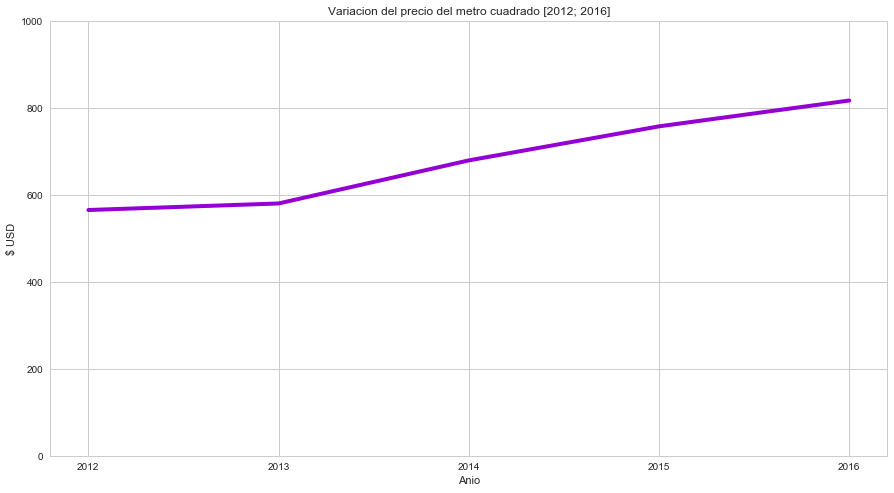

In [52]:
#m2 total
1 = [2012, 2013, 2014, 2015, 2016]
ax = preciom2_anio.plot(kind='line', y = ('precio m2 dolares', 'mean'), figsize=(15,8),\
             title = "Variacion del precio del metro cuadrado [2012; 2016]",\
             xticks=l, legend = False, color = 'darkviolet', lw = 4)
ax.set_ylabel('$ USD')
ax.set_xlabel('Anio')
ax.set_ylim([0,1000])

plt.show()

In [63]:
#variacion anio por anio a ver si se ve algo interesante....
preciom2_2012=preciom2[preciom2['Anio']==2012]
preciom2_2013=preciom2[preciom2['Anio']==2013]
preciom2_2014=preciom2[preciom2['Anio']==2014]
preciom2_2015=preciom2[preciom2['Anio']==2015]
preciom2_2016=preciom2[preciom2['Anio']==2016]


In [65]:
preciom2_2012 = preciom2_2012.groupby('Mes').agg({'precio m2 construccion dolares':[np.mean, np.size]})
preciom2_2012

precio m2 construccion dolares        
                              mean    size
Mes                                       
1                       489.524167   964.0
2                       475.152551   850.0
3                       510.758867   687.0
4                       510.241518   920.0
5                       499.358973  1231.0
6                       508.201989   959.0
7                       494.246117  1240.0
8                       508.588674  2360.0
9                       530.361045  1636.0
10                      547.162614  1928.0
11                      515.060231   937.0
12                      513.876863   870.0

In [66]:
preciom2_2013 = preciom2_2013.groupby('Mes').agg({'precio m2 construccion dolares':[np.mean, np.size]})
preciom2_2013

precio m2 construccion dolares        
                              mean    size
Mes                                       
1                       496.186686  1272.0
2                       559.350385   870.0
3                       512.332516  1075.0
4                       546.126379  1182.0
5                       532.186251  1352.0
6                       542.832680  1299.0
7                       569.802848  1637.0
8                       568.832292  1637.0
9                       536.573269  2257.0
10                      540.256822  2637.0
11                      528.212283  2641.0
12                      533.740475  2101.0

In [67]:
preciom2_2014 = preciom2_2014.groupby('Mes').agg({'precio m2 construccion dolares':[np.mean, np.size]})
preciom2_2014

precio m2 construccion dolares        
                              mean    size
Mes                                       
1                       578.983920  1580.0
2                       602.049150  1727.0
3                       587.153284  1993.0
4                       634.751019  1948.0
5                       619.303817  2180.0
6                       670.548083  2165.0
7                       637.022830  2260.0
8                       653.947802  2548.0
9                       667.273110  2815.0
10                      661.547096  2732.0
11                      663.731127  3446.0
12                      690.976742  3317.0

In [68]:
preciom2_2015 = preciom2_2015.groupby('Mes').agg({'precio m2 construccion dolares':[np.mean, np.size]})
preciom2_2015

precio m2 construccion dolares        
                              mean    size
Mes                                       
1                       678.762493  3220.0
2                       679.755008  2857.0
3                       713.973210  2936.0
4                       696.748340  2824.0
5                       737.257330  2689.0
6                       769.346353  2765.0
7                       756.949666  2830.0
8                       742.091478  3374.0
9                       733.806687  3655.0
10                      731.677870  4175.0
11                      738.566307  3611.0
12                      717.925576  3207.0

In [69]:
preciom2_2016 = preciom2_2016.groupby('Mes').agg({'precio m2 construccion dolares':[np.mean, np.size]})
preciom2_2016

precio m2 construccion dolares         
                              mean     size
Mes                                        
1                       705.765399   4201.0
2                       725.722938   3350.0
3                       753.339966   3687.0
4                       733.776774   4656.0
5                       755.477792   3936.0
6                       739.163497   5089.0
7                       767.573499   4495.0
8                       765.183718   4733.0
9                       782.575064   4336.0
10                      798.328064   5082.0
11                      808.124425   4597.0
12                      817.815398  21351.0

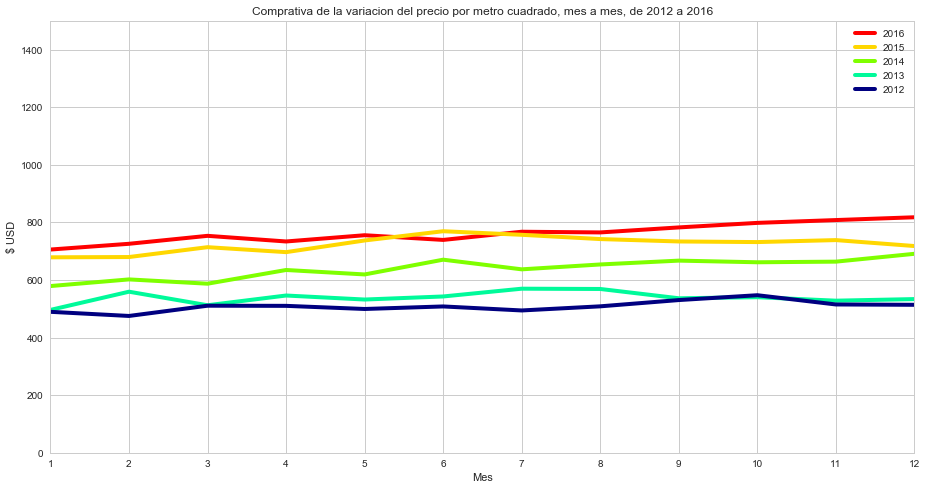

In [71]:
fig = plt.figure(figsize=(12, 6));

ax = fig.add_axes([0,0,1,1]);

preciom2_2016['precio m2 construccion dolares', 'mean'].plot.line(c='red', label="2016", xticks = [i for i in xrange(1, 13)], lw = 4);
preciom2_2015['precio m2 construccion dolares', 'mean'].plot.line(c='gold', label="2015", lw = 4);
preciom2_2014['precio m2 construccion dolares', 'mean'].plot.line(c='chartreuse', label="2014", lw = 4);
preciom2_2013['precio m2 construccion dolares', 'mean'].plot.line(c='mediumspringgreen', label="2013", lw = 4);
preciom2_2012['precio m2 construccion dolares', 'mean'].plot.line(c='navy', label="2012", lw = 4);

plt.title("Comprativa de la variacion del precio por metro cuadrado, mes a mes, de 2012 a 2016")
ax.set_ylim([0,1500])
ax.set_xlim([1, 12])
ax.set_ylabel('$ USD')
ax.set_xlabel('Mes')

ax.legend();